# 1. Importing libraries


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. importing dataset

In [93]:
df=pd.read_csv("cars_price.csv")


# 3. Exploring the dataset

In [94]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [95]:
df.tail()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
39995,39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN
39999,39999,mercedes-benz,190-w201,744,1986,with mileage,272344.0,diesel,1997.0,silver,mechanics,rear drive,D


In [96]:
df.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 2.7+ MB


In [98]:
df.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [99]:
df.dropna(inplace=True)

# 4. Preprocessing the data

In [100]:
from sklearn.preprocessing import LabelEncoder
cat=['model','make','condition','fuel_type','color','transmission']
lc=LabelEncoder()
for i in cat:
    df[i]=lc.fit_transform(df[i])

In [101]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,16,118,565,1993,2,960015.0,1,2000.0,0,1,front-wheel drive,D
1,1,12,238,5550,2008,2,172000.0,0,1400.0,10,1,front-wheel drive,M
2,2,33,409,8300,2008,2,223000.0,1,2500.0,8,0,front-wheel drive,D
3,3,48,235,3300,2005,2,140000.0,1,1200.0,1,1,front-wheel drive,A
4,4,33,360,2450,2002,1,413000.0,0,2200.0,3,1,front-wheel drive,D


# 5. Feature engineering

In [102]:
x=df.drop(['segment','drive_unit','Unnamed: 0','priceUSD'],axis=1)
y=df['priceUSD']

In [103]:
x.head()

,make,model,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission
0,16,118,1993,2,960015.0,1,2000.0,0,1
1,12,238,2008,2,172000.0,0,1400.0,10,1
2,33,409,2008,2,223000.0,1,2500.0,8,0
3,48,235,2005,2,140000.0,1,1200.0,1,1
4,33,360,2002,1,413000.0,0,2200.0,3,1


# 6. seperating into training and testing part

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=112)

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 7. Training the model

In [106]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
result=model.fit(X_train,y_train)

# 8. Testing the model

In [107]:
prediction=model.predict(X_test)
prediction

array([11689.30699015,  1972.15122353,  3334.54495025, ...,
        2870.00663157,  4093.96589873,  2795.84558226])

# 9. Calculating accuracy

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.5140332600197584

# 10. Deploying the model

In [109]:
new_prediction=result.predict([[32,165,45,2,6289,2,206,0,1]])
new_prediction

array([-1087883.6113301])

# 11. Data visualization 

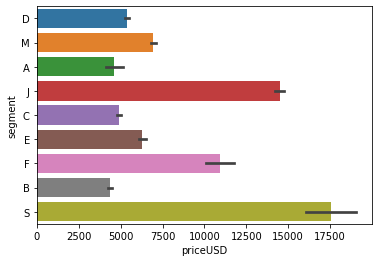

In [111]:
sns.barplot(x='priceUSD',y='segment',data=df)

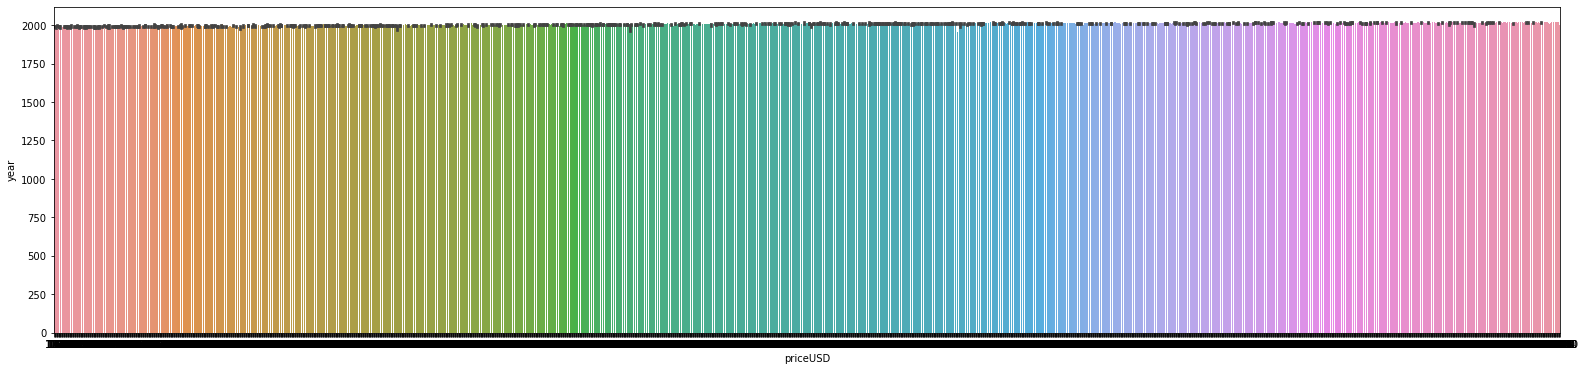

In [113]:
plt.figure(figsize=(27, 6))
sns.barplot(x='priceUSD',y='year',data=df)